# Mac Address Feature Cleaning

The notebook aims at understanding the mac addresses using a clustering algorithm (k-means) to determine whether the mac addresses are stationary or moving (shoppers).

In [19]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from msci.utils import utils

## Import the data and create mac address data frame

In [4]:
mac_address_df = utils.import_mac_addresses()

In [5]:
print('{} mac addresses with {} features'.format(mac_address_df.shape[0], mac_address_df.shape[1]))

154152 mac addresses with 20 features


## Cluster Analysis

In [115]:
FEATURE_LIST = [
    'frequency',
#     'length_of_stay',
    'radius_of_gyration',
    'count_density_variance',
    'av_speed',
    'av_turning_angle',
    'total_turning_angle',
    'av_turning_angle_velocity',
    'av_path_length',
    'total_path_length',
    'av_straightness',
]

In [116]:
mac_address_clean_df = mac_address_df[FEATURE_LIST + ['shopper', 'is_out_of_hours']].dropna()

In [117]:
mac_address_clean_df.describe()

,frequency,radius_of_gyration,count_density_variance,av_speed,av_turning_angle,total_turning_angle,av_turning_angle_velocity,av_path_length,total_path_length,av_straightness,shopper,is_out_of_hours
count,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000,35216.000000
mean,71.545831,52.055167,2.404412,1.120388,1.722041,87.918430,0.016704,29.376744,1157.742416,2.331960,0.956535,0.017833
std,202.802097,30.266237,1.725476,1.624563,0.472264,278.620301,0.628761,23.362142,2367.233103,1.450781,0.194102,0.132345
min,4.000000,2.019901,0.000000,0.001091,0.000000,0.000000,-3.141593,0.738739,9.472136,1.000000,0.000000,0.000000
25%,9.000000,24.674126,1.136577,0.408852,1.441415,9.298116,-0.094297,14.580162,229.781628,1.556878,0.999986,0.000000
50%,20.000000,53.414292,2.121320,0.640655,1.705663,21.913740,0.005824,22.102417,596.688061,2.005403,1.000000,0.000000
75%,64.000000,75.648708,3.367730,1.100472,1.990151,69.447232,0.126617,35.778077,1363.452965,2.635075,1.000000,0.000000
max,6606.000000,155.334048,20.506097,26.355940,3.141593,6745.491906,3.141593,233.275970,140958.829109,37.687010,1.000000,1.000000


In [118]:
for feature in FEATURE_LIST:
    mac_address_clean_df[feature] = scale(mac_address_clean_df[feature])

c:\users\tvb\envs\venv-msci\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [119]:
samples = mac_address_clean_df.as_matrix(
    columns=FEATURE_LIST
)

In [120]:
n_clusters = 2

model = KMeans(n_clusters=n_clusters)
model.fit(samples)
labels = model.predict(samples)

In [121]:
mac_address_clean_df['k_means_label'] = labels

In [122]:
mac_address_clean_df.k_means_label.value_counts()

0    34636
1      580
Name: k_means_label, dtype: int64

## Correlation plots

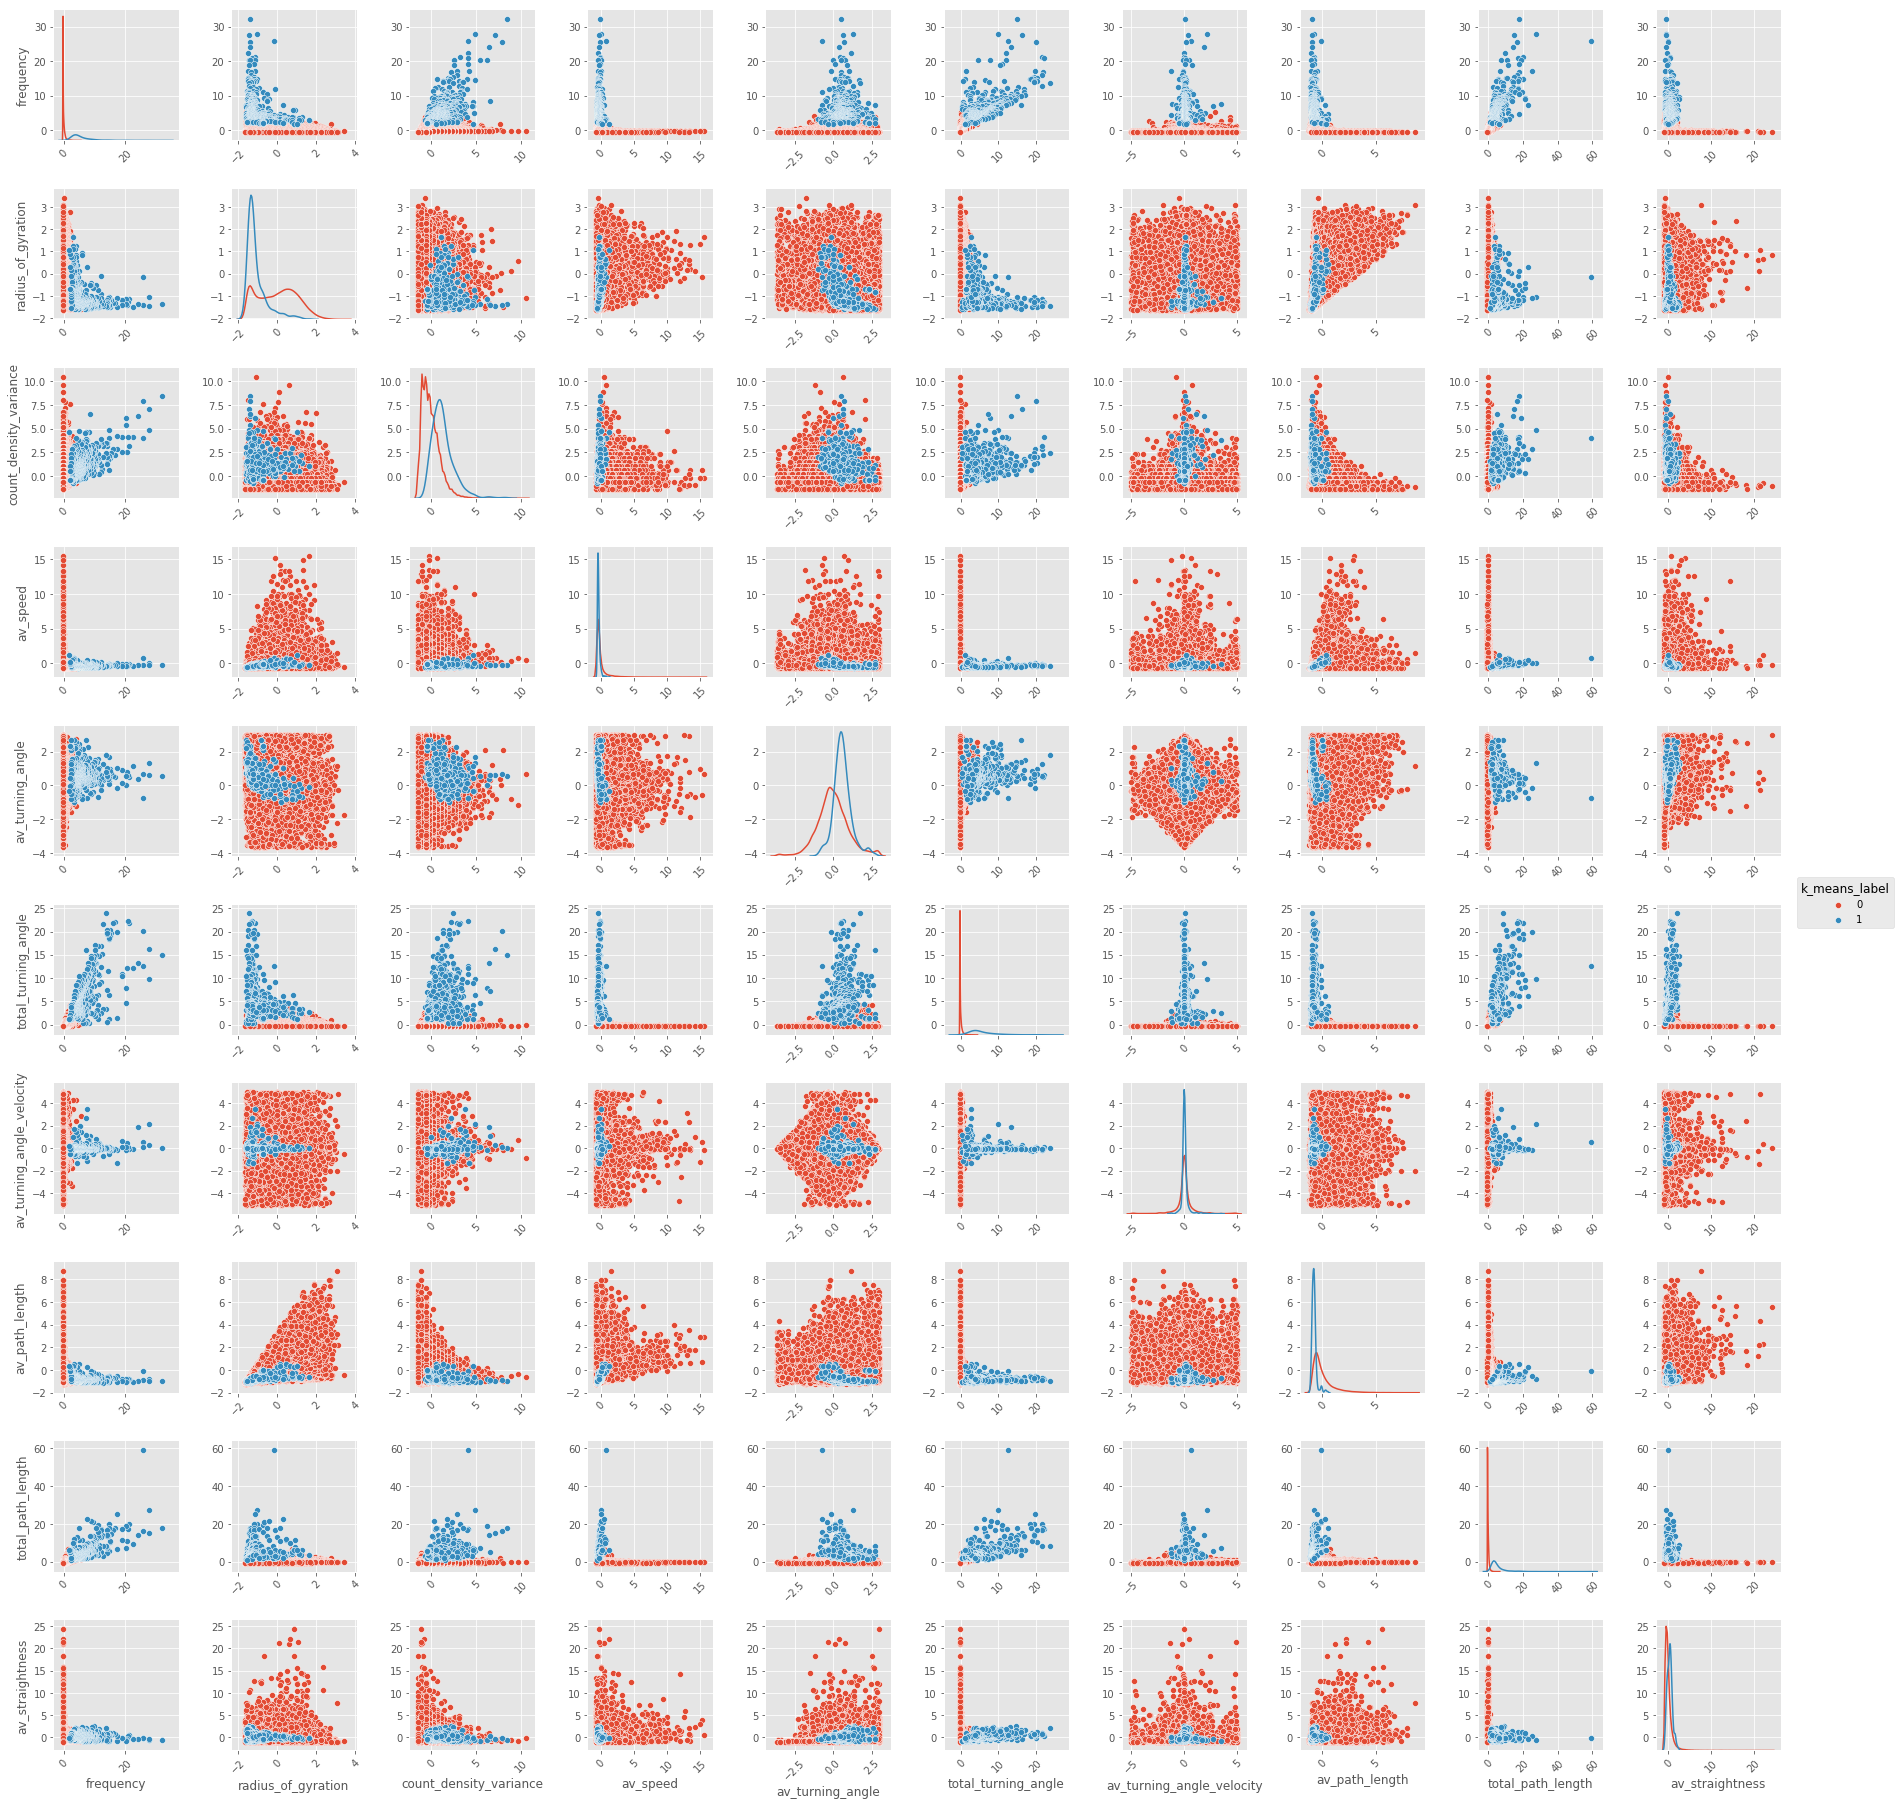

In [123]:
g = sns.pairplot(
    mac_address_clean_df, 
    vars=FEATURE_LIST,
    hue="k_means_label", diag_kind="kde", dropna=True
)
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

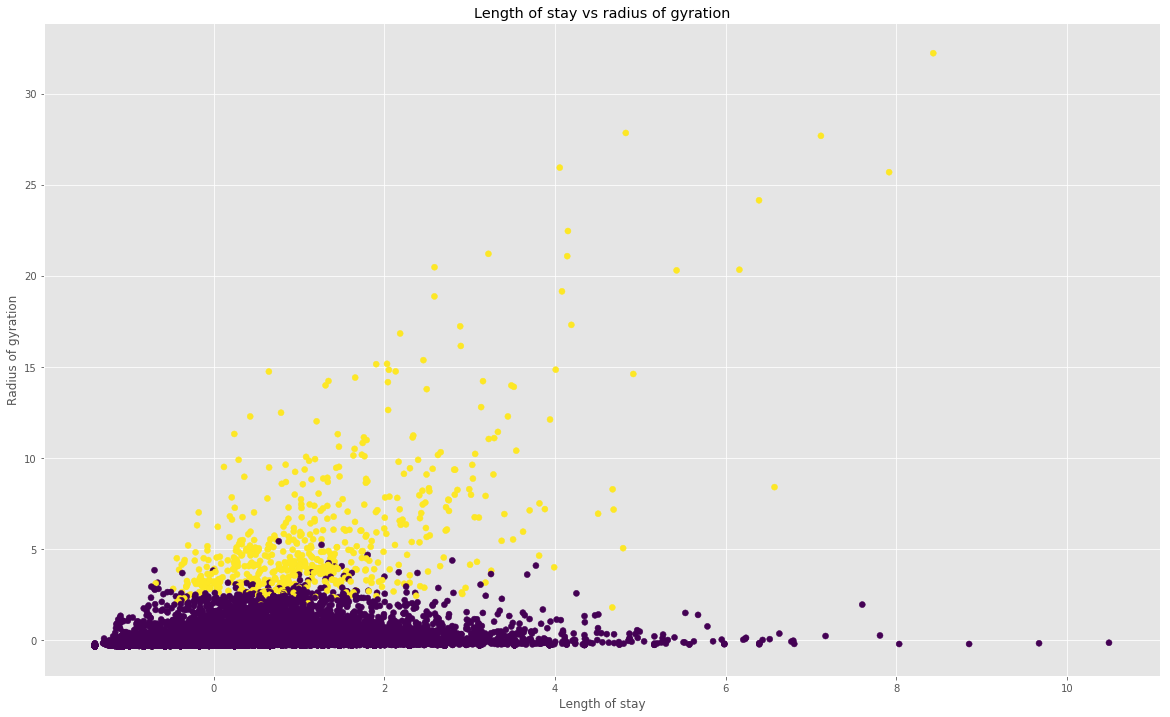

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

xs = samples[:,2]
ys = samples[:,0]

axes.scatter(xs, ys, c=labels)
axes.set_title('Length of stay vs radius of gyration')
axes.set_xlabel('Length of stay')
axes.set_ylabel('Radius of gyration');

In [30]:
from msci.cleaning.bayesian_inference import sequential

In [32]:
prob_estimates = sequential(0.2, mac_address_df, FEATURE_LIST)

frequency (0.849486674097077, 9.761748526974903e-09)
frequency (0.9218500468437009, 7.841004004272413e-09)
length_of_stay (0.9975249212531696, 1.1808917077478683e-08)
length_of_stay (0.8808903821172067, 1.076492169117548e-08)
radius_of_gyration (0.9301066633808558, 6.702239141162929e-10)
radius_of_gyration (0.9967946402554867, 1.1518872537022233e-08)
count_density_variance (0.0, 0.0)
count_density_variance (0.0, 0.0)
av_speed (0.0, 0.0)
av_speed (0.0, 0.0)
av_turning_angle (0.0, 0.0)
av_turning_angle (0.0, 0.0)
total_turning_angle (0.7918558865827524, 6.714515305553297e-12)
total_turning_angle (0.8726156948426869, 1.3859207488113858e-08)
av_turning_angle_velocity (0.0, 0.0)
av_turning_angle_velocity (0.0, 0.0)
av_path_length (0.9232874679569462, 1.4637317927808285e-08)
av_path_length (0.9982096729925798, 1.4899404968155085e-08)
total_path_length (0.8192429686989352, 1.0978628708156501e-10)
total_path_length (0.9585197096473755, 1.3262452696898487e-08)
av_straightness (0.0, 0.0)
av_stra

c:\users\tvb\documents\repos\msci-complexity-project\msci\cleaning\bayesian_inference.py:40: RuntimeWarning: invalid value encountered in true_divide
  normal_stationary_posterior = posterior_stationary / sums
c:\users\tvb\documents\repos\msci-complexity-project\msci\cleaning\bayesian_inference.py:41: RuntimeWarning: invalid value encountered in true_divide
  normal_shopper_posterior = posterior_shopper / sums


av_turning_angle
total_turning_angle
av_turning_angle_velocity
av_path_length
total_path_length
av_straightness


In [46]:
prob_estimates[-1][0]

array([  1.,   1.,   1., ...,  nan,  nan,  nan])

In [48]:
mac_address_df['shopper'] = prob_estimates[-1][1]
mac_address_df['stationary_device'] = prob_estimates[-1][0]

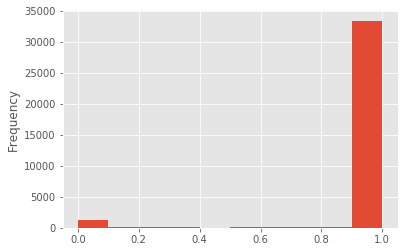

In [52]:
mac_address_df.shopper.plot.hist()

In [54]:
mac_address_df[mac_address_df.shopper > 0.9].is_out_of_hours.value_counts()

0    33304
1       83
Name: is_out_of_hours, dtype: int64

In [94]:
mac_address_df[mac_address_df.shopper > 0.9].is_out_of_hours.value_counts()

0    33304
1       83
Name: is_out_of_hours, dtype: int64

In [98]:
mac_address_clean_df[mac_address_clean_df.shopper < 0.0005].k_means_label.value_counts()

0    526
1    123
Name: k_means_label, dtype: int64

In [99]:
mac_address_clean_df[mac_address_clean_df.shopper > 0.0005].is_out_of_hours.value_counts()

1    376
0    273
Name: is_out_of_hours, dtype: int64

In [129]:
mac_address_clean_df[mac_address_clean_df.k_means_label == 1].is_out_of_hours.value_counts()

0    304
1    276
Name: is_out_of_hours, dtype: int64

In [113]:
len(mac_address_clean_df[
    (mac_address_clean_df.k_means_label == 1) & (mac_address_clean_df.shopper > 0.9)
]) / len(mac_address_clean_df[mac_address_clean_df.k_means_label == 0])

41.73125

In [114]:
len(mac_address_clean_df[
    (mac_address_clean_df.k_means_label == 1) & (mac_address_clean_df.shopper > 0.9)
]) / len(mac_address_clean_df[mac_address_clean_df.shopper > 0.9])

0.999940096444724

In [112]:
len(mac_address_clean_df[
    (mac_address_clean_df.k_means_label == 0) & (mac_address_clean_df.shopper < 0.1)
]), 
len(mac_address_clean_df[mac_address_clean_df.k_means_label == 0]), 
len(mac_address_clean_df[mac_address_clean_df.shopper < 0.1])

1241